In [1]:
import pandas as pd
import numpy as np
import pathlib as pl

from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

from scipy.stats import mannwhitneyu, fisher_exact, pearsonr, kruskal

In [2]:
import sys
sys.path.append("../../FinalCode/")
import download.download as dwnl
import utils.plotting as plting
import adVMP.adVMP_discovery as discov
import adVMP.adVMP_plots as advmpplt

In [37]:
# For figures
colors = sns.color_palette("muted")
fig_dir = pl.Path("/Users/josephineyates/Documents/CRC_polyp/ArticleFigures/unit")

In [4]:
colors

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

# Download adVMP

In [38]:
union_cpgs = pd.read_csv("/Users/josephineyates/Documents/CRC_polyp/FinalData/adVMP/union_cpgs.csv", index_col=0).values.ravel()

In [8]:
background_cpgs = pd.read_csv("/Users/josephineyates/Documents/CRC_polyp/FinalData/variable_probes/union_cpgs_5_pct_most_variable_onlyhealthy.csv",index_col=0).values.ravel()

# Download GSE199057

In [39]:
test_ext_data = pd.read_pickle("/Users/josephineyates/Documents/CRC_polyp/methylprep_GSE199057/GPL21145/beta_values.pkl").T

test_ext_data = test_ext_data.dropna(axis=1)
test_ext_clin = pd.read_pickle("/Users/josephineyates/Documents/CRC_polyp/methylprep_GSE199057/GPL21145/GSE199057_GPL21145_meta_data.pkl").set_index("Sample_ID")
test_ext_clin["Ad_risk"] = test_ext_clin["tissue type"].replace({"normal colon tissue from non-CRC patient": 0, 
                            "normal colon tissue from CRC patient": 1, 
                            "colon tumor sample from CRC patient": 2})
test_ext_data = test_ext_data.loc[test_ext_clin.index]

In [40]:
heatmap_df1, hit_fraction1 = discov.get_heatmap_df(selcpgs=union_cpgs, EPIC_m=test_ext_data, phenotypes=test_ext_clin["Ad_risk"].ravel())

heatmap_df1["Ad_plot"] = heatmap_df1["Ad"].replace({0: "Healthy", 1: "NAC", 2: "Cancer"})

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ftsize)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


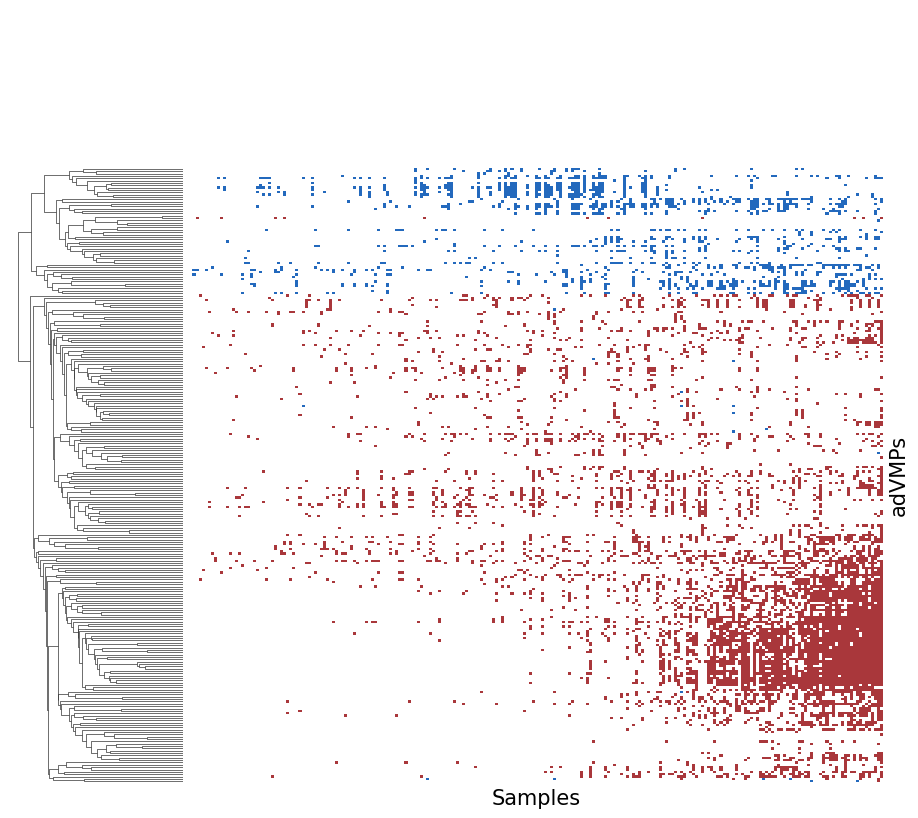

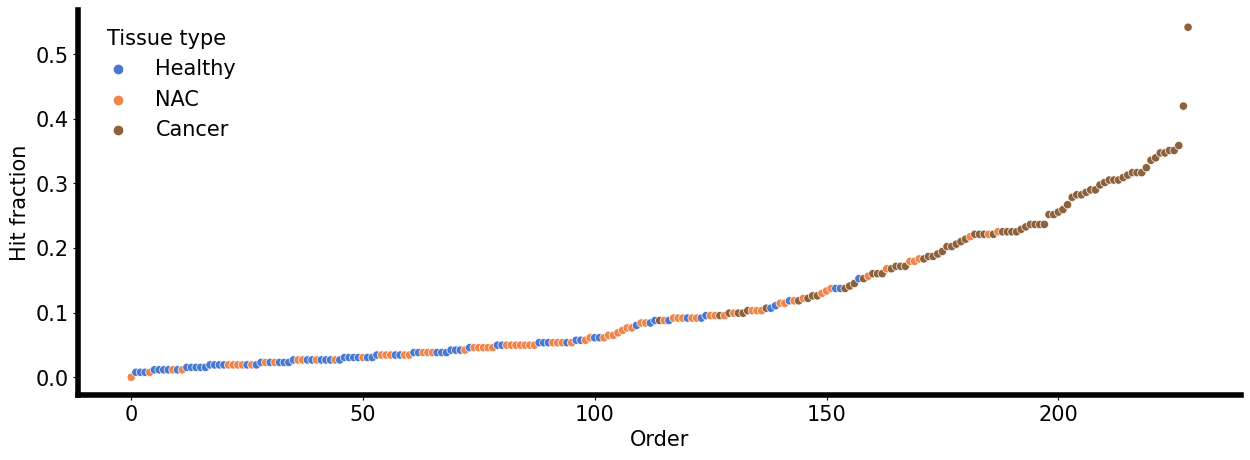

In [41]:
advmpplt.get_performance_plots(
    heatmap_df=heatmap_df1,
    fig_dir=fig_dir / "GSE199057", hue_worm="Ad_plot",
    hue_palette_worm={"Healthy": colors[0], "NAC": colors[1], "Cancer": colors[5]}, 
    ftsize=15, leg_ftsize=15, figsize=5, rocauc=False, leg_title="Tissue type", hue_order=["Healthy","NAC","Cancer"],
)

# Download GSE132804

In [42]:
data1 = pd.read_pickle("/Users/josephineyates/Documents/CRC_polyp/methylprep_GSE132804/GPL21145/beta_values.pkl").T
data1 = data1.dropna(axis=1)
ext_clin1 = pd.read_pickle("/Users/josephineyates/Documents/CRC_polyp/methylprep_GSE132804/GPL21145/GSE132804_GPL21145_meta_data.pkl").set_index("Sample_ID")
ext_clin1["Ad_risk"] = ext_clin1["crc risk"].replace({"High": 2, "Medium": 1, "Low": 0})

red_clin = ext_clin1
data1 = data1.loc[ext_clin1.index]

In [43]:
heatmap_df2, hit_fraction2 = discov.get_heatmap_df(selcpgs=union_cpgs, EPIC_m=data1, phenotypes=red_clin["Ad_risk"].ravel())

heatmap_df2["Ad_plot"] = heatmap_df2["Ad"].replace({0: "Healthy", 1: "NAA", 2: "NAC"})

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ftsize)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


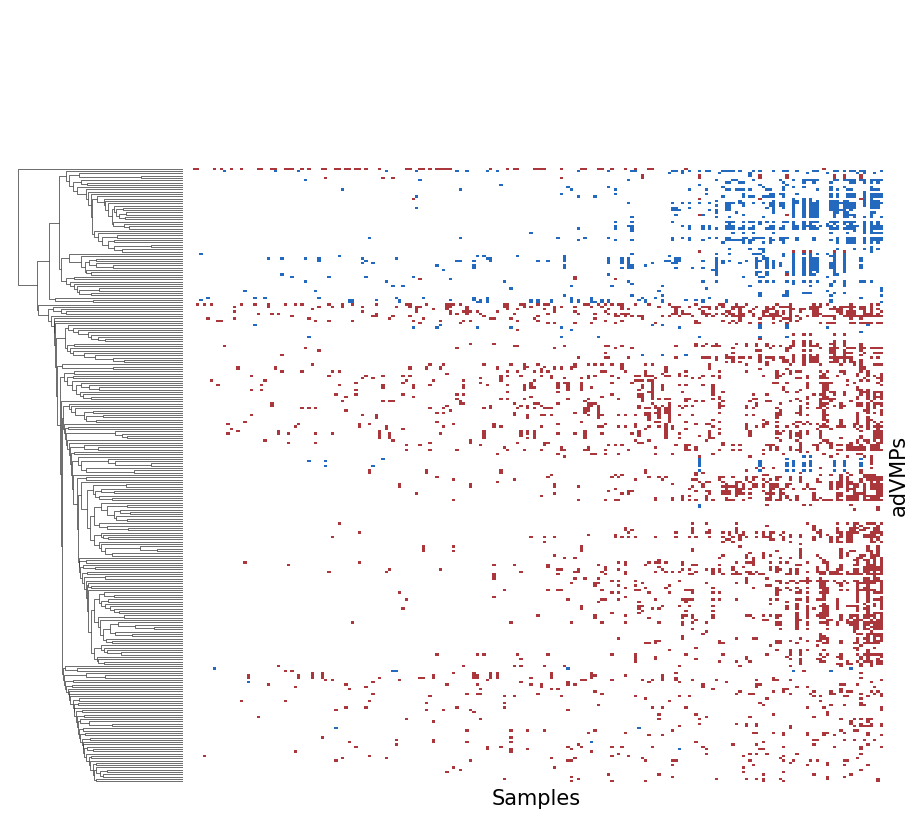

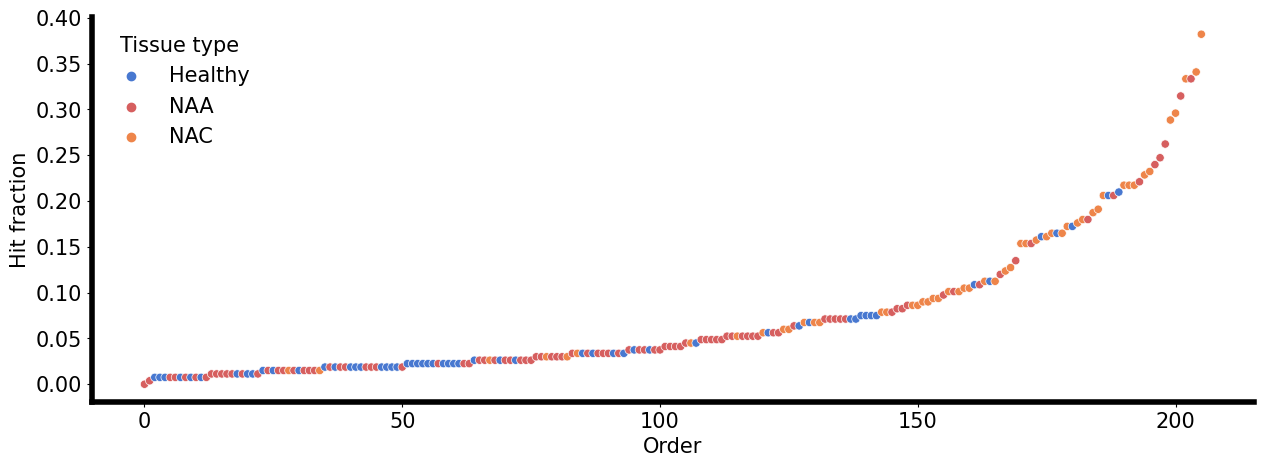

In [44]:
advmpplt.get_performance_plots(
    heatmap_df=heatmap_df2,
    fig_dir=fig_dir / "GSE132804", hue_worm="Ad_plot",
    hue_palette_worm={"Healthy": colors[0], "NAA": colors[3], "NAC": colors[1]}, 
    ftsize=15, leg_ftsize=15, figsize=5, rocauc=False, leg_title="Tissue type", 
    hue_order=["Healthy","NAA","NAC"],
)

# Download GSE48684

In [45]:
data = pd.read_pickle("/Users/josephineyates/Documents/CRC_polyp/validation_sets/GSE48684/methylation.pkl")

data = data.set_index("Unnamed: 0")

data = data.dropna(axis=1)

ext_clin = pd.read_csv("/Users/josephineyates/Documents/CRC_polyp/validation_sets/GSE48684/metadata.csv",index_col=0)

ext_clin["Location"] = ext_clin.region.replace({'colon': "Unknown", "Retum": "Rectum", 
                         "Distal": "Left", "Proximal": "Right", "right": "Right", "left": "Left"})

ext_clin["Ad_risk"] = ext_clin.disease.replace({"cancer": 3, "adenoma": 2, "normal-C": 1, "normal-H": 0})
data = data.loc[ext_clin.index]

In [46]:
heatmap_df3, hit_fraction3 = discov.get_heatmap_df(selcpgs=union_cpgs, EPIC_m=data, phenotypes=ext_clin["Ad_risk"].ravel())

heatmap_df3["Ad_plot"] = heatmap_df3["Ad"].replace({0: "Healthy", 1: "NAC", 2: "Adenoma", 3: "Cancer"})

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ftsize)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


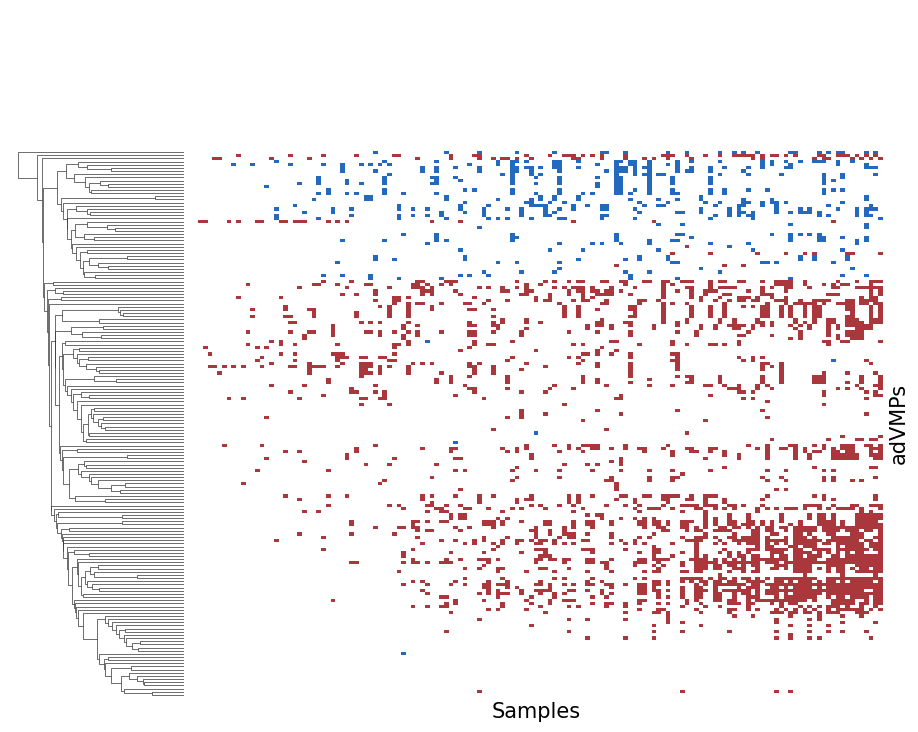

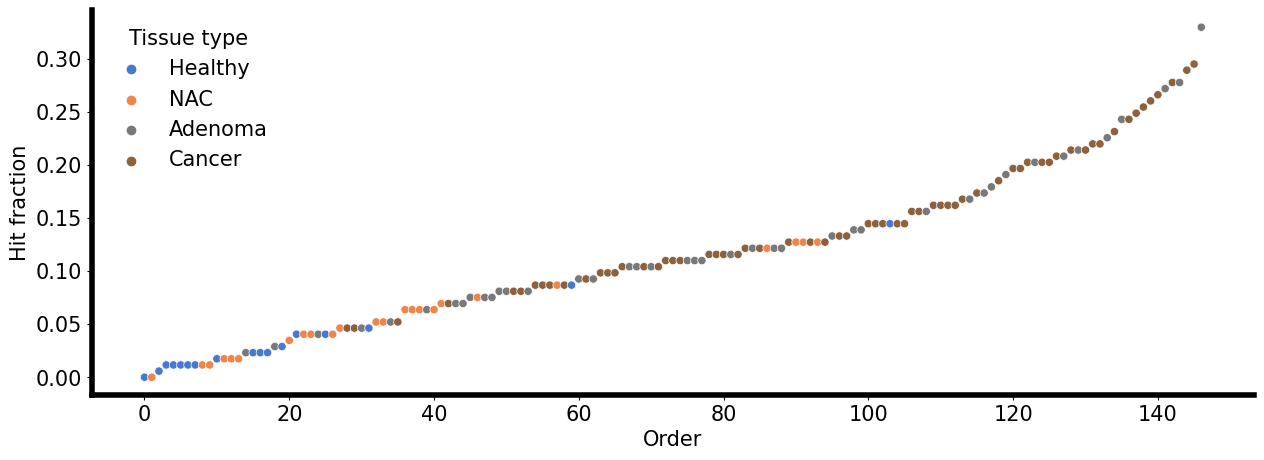

In [47]:
advmpplt.get_performance_plots(
    heatmap_df=heatmap_df3,
    fig_dir=fig_dir / "GSE48684", hue_worm="Ad_plot",
    hue_palette_worm={"Healthy": colors[0], "NAC": colors[1], "Adenoma": colors[7], "Cancer": colors[5]}, 
    ftsize=15, leg_ftsize=15, figsize=5, rocauc=False, leg_title="Tissue type", 
    hue_order=["Healthy","NAC","Adenoma","Cancer"],
)

# Hit fraction

In [48]:
dfs = []
df1 = heatmap_df1[heatmap_df1["Ad"].isin([0,1])].copy()
df1 = df1[["Hit fraction","Ad_plot","Ad"]]
df1 = pd.concat([df1,pd.DataFrame(["GSE199057"]*df1.shape[0],
                                      index=df1.index,columns=["Batch"])],axis=1)
df1["Order"] = np.arange(df1.shape[0])
vc1 = df1.Ad_plot.value_counts()
dfs.append(df1)

df2 = heatmap_df2[heatmap_df2["Ad"].isin([0,2])].copy()
df2["Ad"] = df2["Ad"].replace({2: 1})
df2 = df2[["Hit fraction","Ad_plot","Ad"]]
df2 = pd.concat([df2,pd.DataFrame(["GSE132804"]*df2.shape[0],
                                      index=df2.index,columns=["Batch"])],axis=1)
df2["Order"] = np.arange(df2.shape[0])
vc2 = df2.Ad_plot.value_counts()
dfs.append(df2)

df3 = heatmap_df3[heatmap_df3["Ad"].isin([0,1])].copy()
df3 = df3[["Hit fraction","Ad_plot","Ad"]]
df3 = pd.concat([df3,pd.DataFrame(["GSE48684"]*df3.shape[0],
                                      index=df3.index,columns=["Batch"])],axis=1)
df3["Order"] = np.arange(df3.shape[0])
vc3 = df3.Ad_plot.value_counts()
dfs.append(df3)

In [49]:
df = pd.concat(dfs)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GSE132804_Healthy vs. GSE132804_NAC: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.274e-10 U_stat=4.465e+02
GSE199057_Healthy vs. GSE199057_NAC: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.693e-05 U_stat=1.762e+03
GSE48684_Healthy vs. GSE48684_NAC: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.392e-02 U_stat=1.110e+02


/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


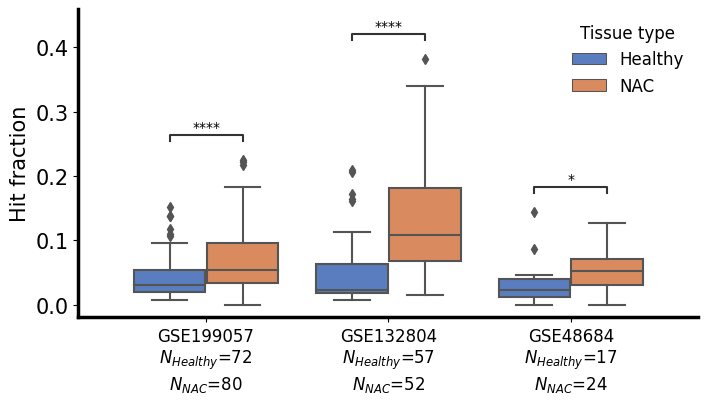

In [50]:
fig, ax= plt.subplots(1,1, figsize=(8,4))
sns.boxplot(data=df, x="Batch", y="Hit fraction", 
            hue="Ad_plot", palette={"Healthy": colors[0], "NAC": colors[1]}, hue_order=["Healthy","NAC"],)
annot = Annotator(
        ax,
        pairs=[(("GSE199057", "Healthy"),("GSE199057", "NAC")),
               (("GSE132804", "Healthy"),("GSE132804", "NAC")),
               (("GSE48684", "Healthy"),("GSE48684", "NAC"))],
        data=df, x="Batch", y="Hit fraction", hue="Ad_plot", hue_order=["Healthy","NAC"],
    )
annot.configure(
        test="Mann-Whitney",
        loc="inside",
        show_test_name=False,
        verbose=2,
        comparisons_correction="BH",
        correction_format="replace",
    )
annot.apply_test()
ax, _ = annot.annotate()
plting.transform_plot_ax(ax, legend_title="Tissue type",linew=2.5)
ax.set_xticklabels(["GSE199057\n$N_{Healthy}$="+f"{vc1.loc['Healthy']}\n"+"$N_{NAC}$="+f"{vc1.loc['NAC']}",
                    "GSE132804\n$N_{Healthy}$="+f"{vc2.loc['Healthy']}\n"+"$N_{NAC}$="+f"{vc2.loc['NAC']}",
                    "GSE48684\n$N_{Healthy}$="+f"{vc3.loc['Healthy']}\n"+"$N_{NAC}$="+f"{vc3.loc['NAC']}"], size=12)
ax.set_xlabel("")
fig.savefig(fig_dir / "validationCohorts_hit_fraction_dist.svg", bbox_inches="tight")

/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ftsize)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ftsize)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebook

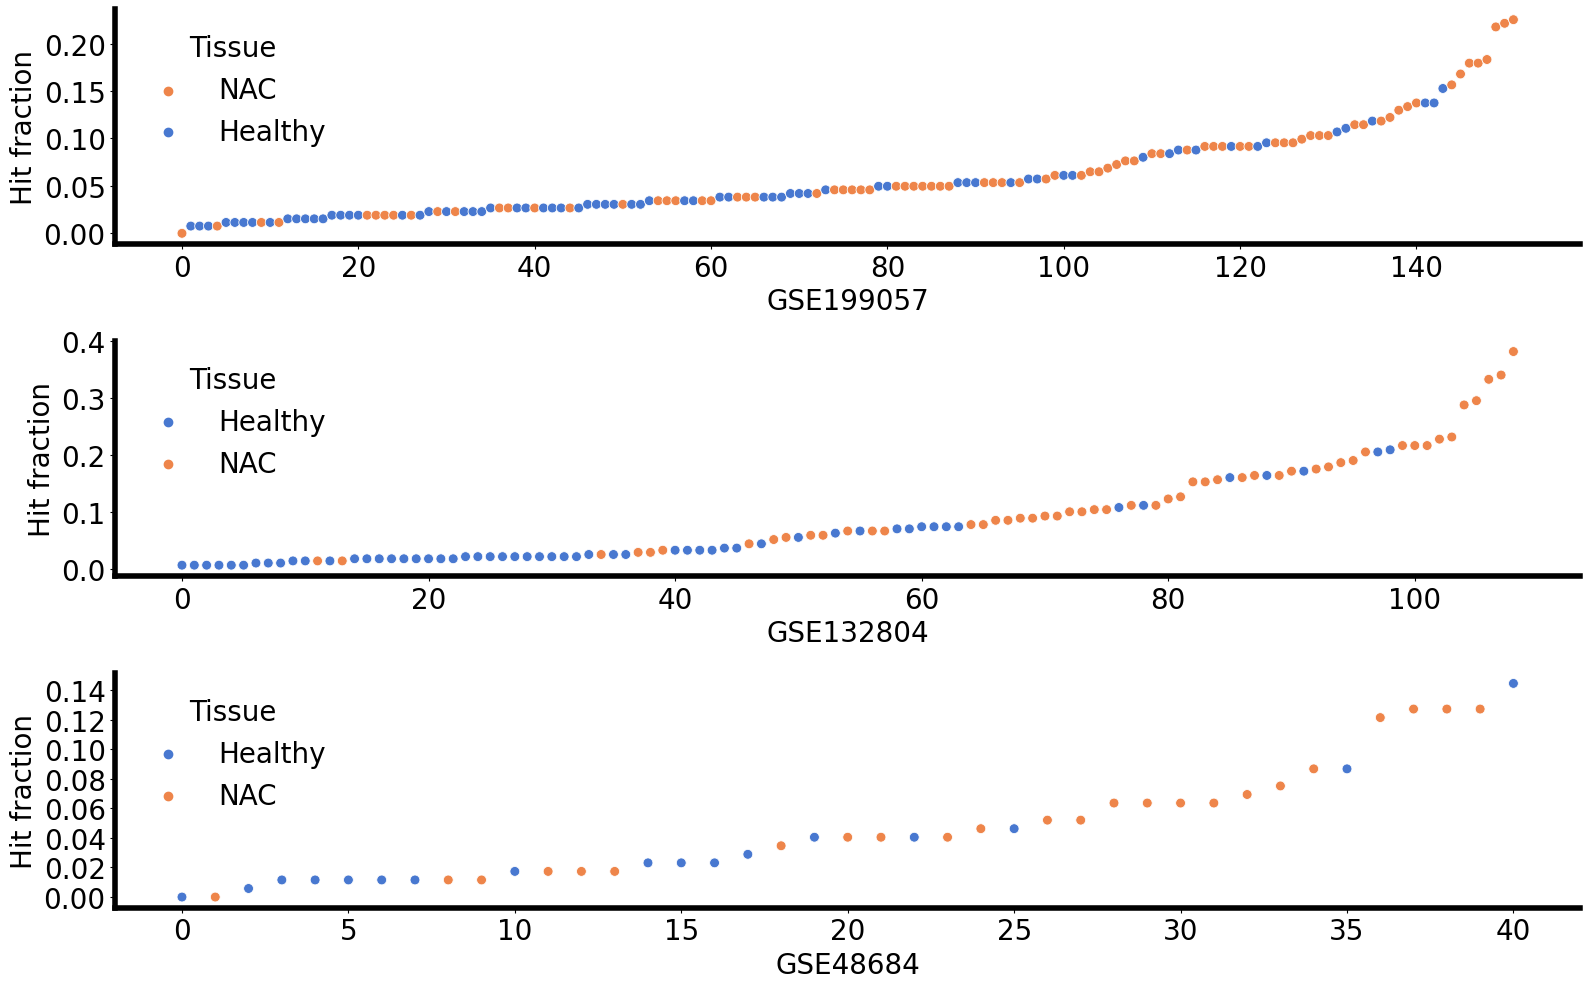

In [51]:
fig, ax = plt.subplots(3, 1, figsize=(16,10))
flatax = ax.flatten()
gsenames = ["GSE199057","GSE132804","GSE48684"]
for i in range(len(flatax)):
    
    sns.scatterplot(
        data=dfs[i],
        x="Order",
        y="Hit fraction",
        hue="Ad_plot", s=50,
        palette={"Healthy": colors[0], "NAC": colors[1]}, ax=flatax[i],
    )
    plting.transform_plot_ax(flatax[i], legend_title="Tissue", ftsize=20, leg_ftsize=20)
    flatax[i].set_xlabel(gsenames[i], fontsize=20)
fig.tight_layout()
fig.savefig(fig_dir / "worm_plot_full_validationCohorts.svg", bbox_inches="tight")

In [52]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ftsize)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


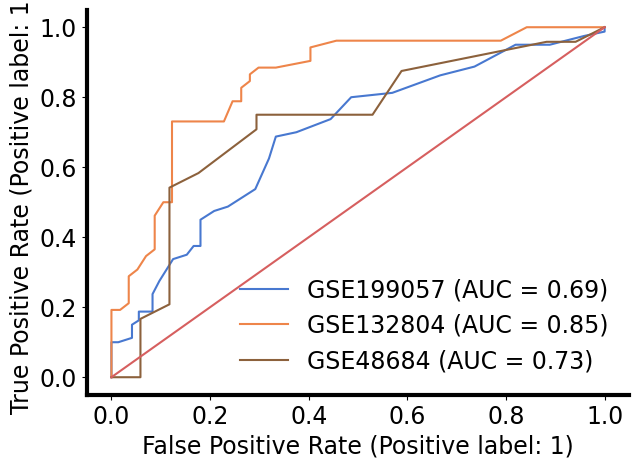

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
RocCurveDisplay.from_predictions(
    df1["Ad"].astype(int).ravel(),
    df1["Hit fraction"].ravel(),
    ax=ax,
    c=colors[0],
    name='GSE199057',
)
RocCurveDisplay.from_predictions(
    df2["Ad"].astype(int).ravel(),
    df2["Hit fraction"].ravel(),
    ax=ax,
    c=colors[1],
    name='GSE132804',
)
RocCurveDisplay.from_predictions(
    df3["Ad"].astype(int).ravel(),
    df3["Hit fraction"].ravel(),
    ax=ax, 
    c=colors[5],
    name='GSE48684',
)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), c=colors[3])
plting.transform_plot_ax(ax, legend_title="", ftsize=17, leg_ftsize=17, linew=3)
fig.savefig(fig_dir / "validationCohorts_ROC_AUC_curve_crossval.svg", bbox_inches="tight")

In [19]:
import adVMP.comparison_random as cprdn

100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 11.80it/s]
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


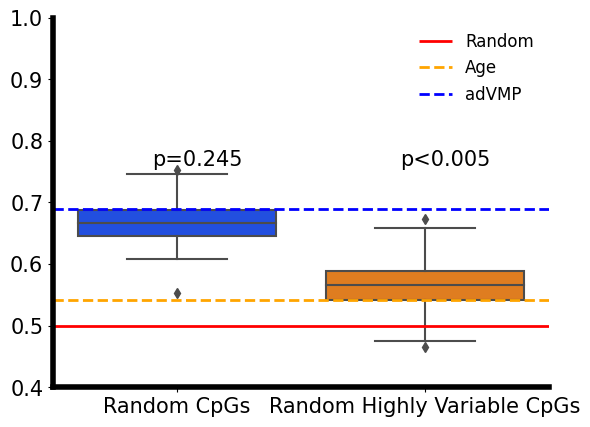

In [20]:
gse199057_ref = 0.69

background_cpgs = pd.read_csv("../../FinalData/variable_probes/union_cpgs_5_pct_most_variable_onlyhealthy.csv",index_col=0).values.ravel()

cprdn.get_comparison_rdn_val(
    background_cpgs=background_cpgs,
    figdir=fig_dir / "GSE199057",
    ref=gse199057_ref,
    phenotypes=test_ext_clin["Ad_risk"].ravel(),
    union_cpgs=union_cpgs,
    data=test_ext_data,
    clin=test_ext_clin,
    n_iter=200,
    NAC=True,
    hit_limit=4,
    risk_col="Ad_risk",
    exclude_one=True,age_col="age")


100%|█████████████████████████████████████████| 200/200 [00:20<00:00,  9.69it/s]
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


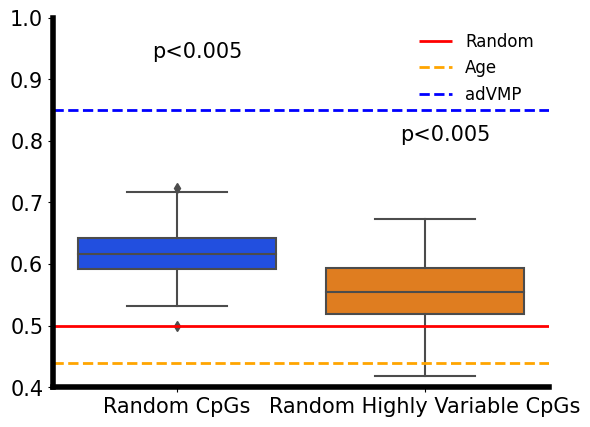

In [21]:
gse132804_ref = 0.85

background_cpgs = pd.read_csv("../../FinalData/variable_probes/union_cpgs_5_pct_most_variable_onlyhealthy.csv",index_col=0).values.ravel()

cprdn.get_comparison_rdn_val(
    background_cpgs=background_cpgs,
    figdir=fig_dir / "GSE132804",
    ref=gse132804_ref,
    phenotypes=red_clin["Ad_risk"].ravel(),
    union_cpgs=union_cpgs,
    data=data1,
    clin=red_clin,
    n_iter=200,
    NAC=False,
    hit_limit=4,
    risk_col="Ad_risk",
    exclude_one=True,age_col="age")


100%|█████████████████████████████████████████| 200/200 [00:14<00:00, 14.25it/s]
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


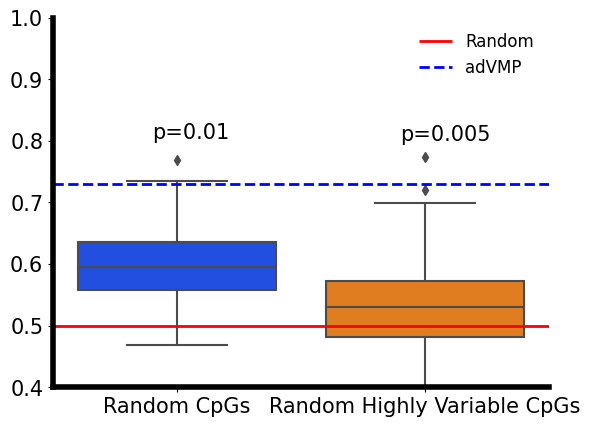

In [22]:
gse48684_ref = 0.73

background_cpgs = pd.read_csv("../../FinalData/variable_probes/union_cpgs_5_pct_most_variable_onlyhealthy.csv",index_col=0).values.ravel()

cprdn.get_comparison_rdn_val(
    background_cpgs=background_cpgs,
    figdir=fig_dir / "GSE48684",
    ref=gse48684_ref,
    phenotypes=ext_clin["Ad_risk"].ravel(),
    union_cpgs=union_cpgs,
    data=data,
    clin=ext_clin,
    n_iter=200,
    NAC=True,
    hit_limit=4,
    risk_col="Ad_risk",
    exclude_one=True,age_col=None)


# How about vs neoplastic tissue?

In [54]:
dfs = []
df1 = heatmap_df1[["Hit fraction","Ad_plot","Ad"]]
df1 = pd.concat([df1,pd.DataFrame(["GSE199057"]*df1.shape[0],
                                      index=df1.index,columns=["Batch"])],axis=1)
df1["Order"] = np.arange(df1.shape[0])
vc1 = df1.Ad_plot.value_counts()
dfs.append(df1)

df3 = heatmap_df3[["Hit fraction","Ad_plot","Ad"]]
df3 = pd.concat([df3,pd.DataFrame(["GSE48684"]*df3.shape[0],
                                      index=df3.index,columns=["Batch"])],axis=1)
df3["Order"] = np.arange(df3.shape[0])
vc3 = df3.Ad_plot.value_counts()
dfs.append(df3)

In [55]:
df = pd.concat(dfs)

In [56]:
df.Ad_plot.unique()

array(['NAC', 'Healthy', 'Cancer', 'Adenoma'], dtype=object)

In [57]:
vc1

NAC        80
Cancer     77
Healthy    72
Name: Ad_plot, dtype: int64

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GSE48684_Adenoma vs. GSE48684_Cancer: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.294e-02 U_stat=1.014e+03
GSE199057_Healthy vs. GSE199057_NAC: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.693e-05 U_stat=1.762e+03
GSE48684_Healthy vs. GSE48684_NAC: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.392e-02 U_stat=1.110e+02
GSE48684_NAC vs. GSE48684_Adenoma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.325e-05 U_stat=1.770e+02
GSE199057_NAC vs. GSE199057_Cancer: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.505e-22 U_stat=2.975e+02
GSE48684_NAC vs. GSE48684_Cancer: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P

/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


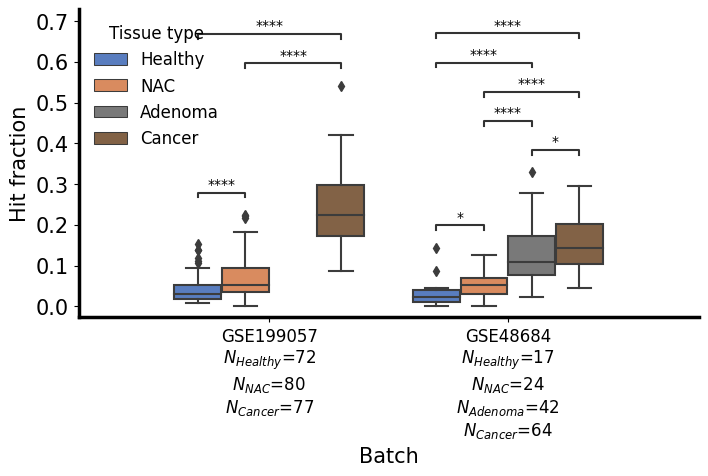

In [58]:
fig, ax= plt.subplots(1,1, figsize=(8,4))
sns.boxplot(data=df, x="Batch", y="Hit fraction", 
            hue="Ad_plot", palette={"Healthy": colors[0], 
                                    "NAC": colors[1],
                                    "Adenoma": colors[7], 
                                    "Cancer": colors[5]}, 
            hue_order=["Healthy","NAC","Adenoma","Cancer"],)
annot = Annotator(
        ax,
        pairs=[(("GSE199057", "Healthy"),("GSE199057", "NAC")),
               (("GSE199057", "NAC"),("GSE199057", "Cancer")),
               (("GSE199057", "Healthy"),("GSE199057", "Cancer")),
               (("GSE48684", "Healthy"),("GSE48684", "NAC")),
               (("GSE48684", "Healthy"),("GSE48684", "Adenoma")),
               (("GSE48684", "Healthy"),("GSE48684", "Cancer")),
               (("GSE48684", "NAC"),("GSE48684", "Adenoma")),
               (("GSE48684", "NAC"),("GSE48684", "Cancer")),
              (("GSE48684", "Adenoma"),("GSE48684", "Cancer")),],
        data=df, x="Batch", y="Hit fraction", hue="Ad_plot", hue_order=["Healthy","NAC","Adenoma","Cancer"],
    )
annot.configure(
        test="Mann-Whitney",
        loc="inside",
        show_test_name=False,
        verbose=2,
        comparisons_correction="BH",
        correction_format="replace",
    )
annot.apply_test()
ax, _ = annot.annotate()
plting.transform_plot_ax(ax, legend_title="Tissue type",linew=2.5)
ax.set_xticklabels(["GSE199057\n$N_{Healthy}$="+f"{vc1.loc['Healthy']}\n"+"$N_{NAC}$="+f"{vc1.loc['NAC']}\n"+"$N_{Cancer}$="+f"{vc1.loc['Cancer']}",
                    "GSE48684\n$N_{Healthy}$="+f"{vc3.loc['Healthy']}\n"+"$N_{NAC}$="+f"{vc3.loc['NAC']}\n"+"$N_{Adenoma}$="+f"{vc3.loc['Adenoma']}\n"+"$N_{Cancer}$="+f"{vc3.loc['Cancer']}"], size=12)
fig.savefig(fig_dir / "validationCohorts_WNeoplastic_hit_fraction_dist.svg", bbox_inches="tight")

In [59]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [60]:
red_df1 = df1[df1["Ad"].isin([0,2])]
red_df1["Ad"] = red_df1["Ad"].replace({2: 1})

red_df3_ad = df3[df3["Ad"].isin([0,2])]
red_df3_ad["Ad"] = red_df3_ad["Ad"].replace({2: 1})

red_df3_cr = df3[df3["Ad"].isin([0,3])]
red_df3_cr["Ad"] = red_df3_cr["Ad"].replace({3: 1})

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_14572/1298278797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df1["Ad"] = red_df1["Ad"].replace({2: 1})
/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_14572/1298278797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df3_ad["Ad"] = red_df3_ad["Ad"].replace({2: 1})
/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_14572/1298278797.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ftsize)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


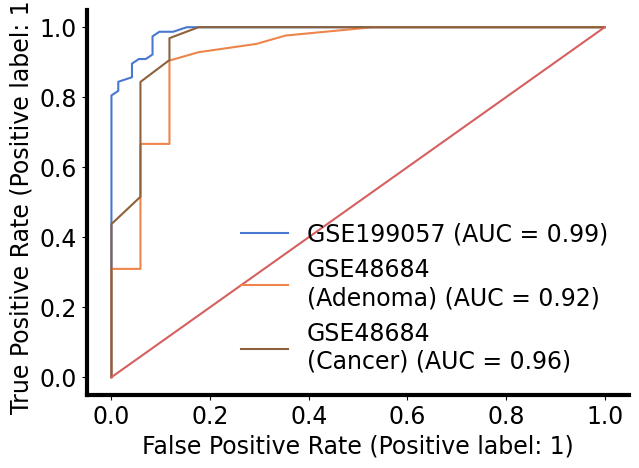

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
RocCurveDisplay.from_predictions(
    red_df1["Ad"].astype(int).ravel(),
    red_df1["Hit fraction"].ravel(),
    ax=ax,
    c=colors[0],
    name='GSE199057',
)
RocCurveDisplay.from_predictions(
    red_df3_ad["Ad"].astype(int).ravel(),
    red_df3_ad["Hit fraction"].ravel(),
    ax=ax,
    c=colors[1],
    name='GSE48684\n(Adenoma)',
)
RocCurveDisplay.from_predictions(
    red_df3_cr["Ad"].astype(int).ravel(),
    red_df3_cr["Hit fraction"].ravel(),
    ax=ax, 
    c=colors[5],
    name='GSE48684\n(Cancer)',
)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), c=colors[3])
plting.transform_plot_ax(ax, legend_title="", ftsize=17, leg_ftsize=17, linew=3)
fig.savefig(fig_dir / "validationCohorts_WNeoplastic_ROC_AUC_curve_crossval.svg", bbox_inches="tight")

# Adenoma on the left

In [62]:
df2 = heatmap_df2.copy()
df2 = df2[["Hit fraction","Ad_plot","Ad"]]
df2 = pd.concat([df2,pd.DataFrame(["GSE132804"]*df2.shape[0],
                                      index=df2.index,columns=["Batch"])],axis=1)
df2["Order"] = np.arange(df2.shape[0])
vc2 = df2.Ad_plot.value_counts()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GSE132804_Healthy vs. GSE132804_NAA: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.637e-01 U_stat=2.392e+03
GSE132804_NAA vs. GSE132804_NAC: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.099e-10 U_stat=9.270e+02
GSE132804_Healthy vs. GSE132804_NAC: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.274e-10 U_stat=4.465e+02


/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


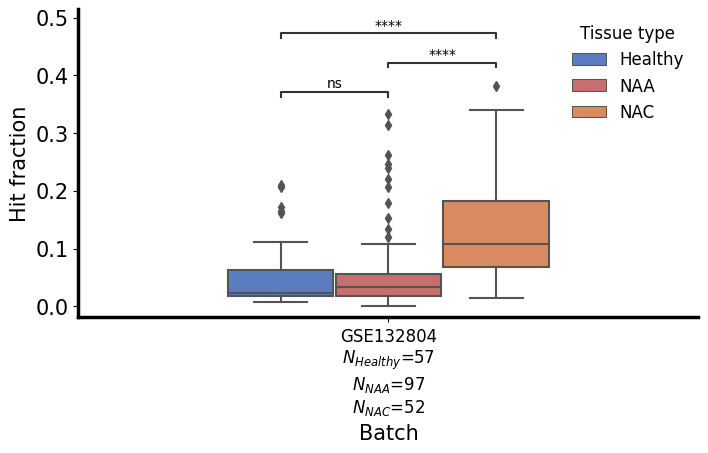

In [63]:
fig, ax= plt.subplots(1,1, figsize=(8,4))
sns.boxplot(data=df2, x="Batch",
            y="Hit fraction", 
            hue="Ad_plot",
            palette={"Healthy": colors[0], "NAA": colors[3], "NAC": colors[1]}, 
            hue_order=["Healthy","NAA",'NAC'],)
annot = Annotator(
        ax,
        pairs=[(("GSE132804","Healthy"), ("GSE132804","NAA")),
               (("GSE132804","Healthy"), ("GSE132804","NAC")),
               (("GSE132804","NAA"), ("GSE132804","NAC"))],
        data=df2, x="Batch", y="Hit fraction", hue="Ad_plot", hue_order=["Healthy","NAA","NAC"],
    )
annot.configure(
        test="Mann-Whitney",
        loc="inside",
        show_test_name=False,
        verbose=2,
        comparisons_correction="BH",
        correction_format="replace",
    )
annot.apply_test()
ax, _ = annot.annotate()
plting.transform_plot_ax(ax, legend_title="Tissue type",linew=2.5)
ax.set_xticklabels(["GSE132804\n$N_{Healthy}$="+f"{vc2.loc['Healthy']}\n"+"$N_{NAA}$="+f"{vc2.loc['NAA']}\n"+"$N_{NAC}$="+f"{vc2.loc['NAC']}",], size=12)
fig.savefig(fig_dir / "validationCohorts_NACA_hit_fraction_dist.svg", bbox_inches="tight")

In [64]:
red_df2_ad = df2[df2["Ad"].isin([0,1])]

red_df2_cr = df2[df2["Ad"].isin([0,2])]
red_df2_cr["Ad"] = red_df2_cr["Ad"].replace({2: 1})

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_14572/2793986757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df2_cr["Ad"] = red_df2_cr["Ad"].replace({2: 1})


/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ftsize)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


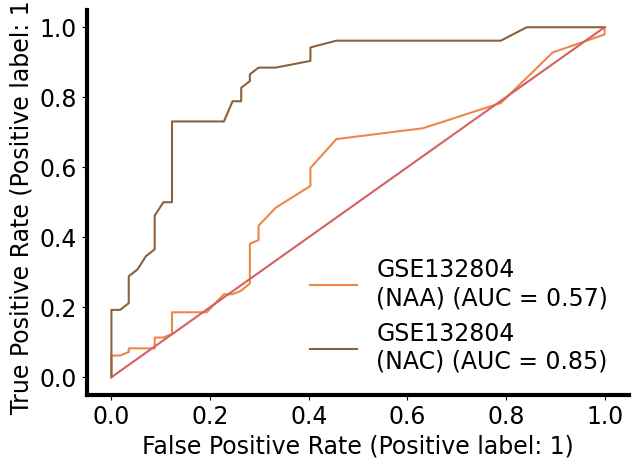

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
RocCurveDisplay.from_predictions(
    red_df2_ad["Ad"].astype(int).ravel(),
    red_df2_ad["Hit fraction"].ravel(),
    ax=ax,
    c=colors[1],
    name='GSE132804\n(NAA)',
)
RocCurveDisplay.from_predictions(
    red_df2_cr["Ad"].astype(int).ravel(),
    red_df2_cr["Hit fraction"].ravel(),
    ax=ax, 
    c=colors[5],
    name='GSE132804\n(NAC)',
)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), c=colors[3])
plting.transform_plot_ax(ax, legend_title="", ftsize=17, leg_ftsize=17, linew=3)
fig.savefig(fig_dir / "validationCohorts_NACA_ROC_AUC_curve_crossval.svg", bbox_inches="tight")

# Manhattan distances for stochastic to coordinated regime

In [38]:
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.utils import shuffle
from scipy.stats import ks_2samp

def manhattan_distance_plot(heatmap_df: pd.DataFrame, 
                            hit_limit: int=4, 
                            ad_col: str="Ad_plot", 
                            n_iter: int=100) -> None:

    cols = heatmap_df.columns.str.startswith("cg") + heatmap_df.columns.str.startswith(
        "chr"
    )
    
    deviation_distance = (heatmap_df.loc[:,cols].abs()>hit_limit).astype(int)

    true_manh_distances = {i: [] for i in heatmap_df[ad_col].unique()}
    manh_dist = manhattan_distances(deviation_distance.values)

    manh_dist = pd.DataFrame(manh_dist,index=deviation_distance.index,columns=deviation_distance.index)

    for risk in sorted(heatmap_df[ad_col].unique()):
        normal_dist = manh_dist.loc[(heatmap_df[ad_col]==risk).values,(heatmap_df[ad_col]==risk).values].values
        true_manh_distances[risk] = normal_dist[np.triu_indices(normal_dist.shape[0], k = 1)]

    random_manh_distances = {h: [] for h in heatmap_df[ad_col].unique()}
    for i in range(n_iter):
        matrix = deviation_distance.copy()
        for i in range(matrix.shape[0]):
            matrix.iloc[i,:] = matrix.iloc[i,:].sample(frac=1).ravel()
        rdn_manh_dist = manhattan_distances(matrix)    

        for risk in heatmap_df[ad_col].unique():
            risk_idx = np.where((heatmap_df[ad_col]==risk).values.ravel())[0]
            risk_dist = rdn_manh_dist[np.ix_(risk_idx,risk_idx)]
            rdn_dist = risk_dist[np.triu_indices(risk_dist.shape[0], k = 1)]
            random_manh_distances[risk].append(rdn_dist)

    for i in random_manh_distances:
        print(i,ks_2samp(np.concatenate(random_manh_distances[i]),true_manh_distances[i]))
        print(np.mean(np.concatenate(random_manh_distances[i])),np.mean(true_manh_distances[i]))
    
    fig, ax = plt.subplots(1,1)
    colors = ['r','b','g','y']
    for i,tp in enumerate(random_manh_distances):
        sns.kdeplot(np.concatenate(random_manh_distances[tp]),c=colors[i],linestyle="--",
                    ax=ax,label=f"Null-{tp}")
        plt.axvline(np.mean(np.concatenate(random_manh_distances[tp])),c=colors[i],linestyle="--")
    for i,tp in enumerate(true_manh_distances):
        sns.kdeplot(true_manh_distances[tp],c=colors[i],label=f"{tp}")
        plt.axvline(np.mean(true_manh_distances[tp]),c=colors[i])
    plting.transform_plot_ax(ax=ax, legend_title="")
    ax.set_xlabel("Manhattan distance")
    return fig

NAC KstestResult(statistic=0.12917246835443036, pvalue=3.3934933128642587e-46)
35.477193037974686 31.537974683544302
Healthy KstestResult(statistic=0.054536384976525853, pvalue=5.151528624492134e-07)
21.947605633802816 20.498435054773083
Cancer KstestResult(statistic=0.5818455228981545, pvalue=0.0)
93.53343130553657 67.99658236500342


/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ftsize)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


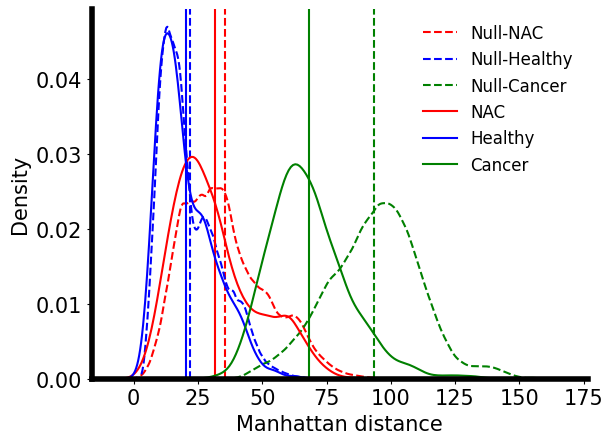

In [39]:
fig = manhattan_distance_plot(heatmap_df=heatmap_df1, hit_limit=4, ad_col="Ad_plot", n_iter=200)
fig.savefig(fig_dir / "GSE199057" / "manhattan_plot_GSE199057.svg", bbox_inches="tight")

Healthy KstestResult(statistic=0.11875000000000002, pvalue=0.040785157660186096)
10.629558823529411 9.485294117647058
NAC KstestResult(statistic=0.12356884057971013, pvalue=0.0004058314845386889)
18.64144927536232 16.47463768115942
Adenoma KstestResult(statistic=0.2127584204413473, pvalue=1.6028229331966767e-34)
38.898943089430894 32.88850174216028
Cancer KstestResult(statistic=0.27092261904761905, pvalue=1.4917345358479222e-130)
44.701170634920636 37.63144841269841


/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=ftsize)
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)


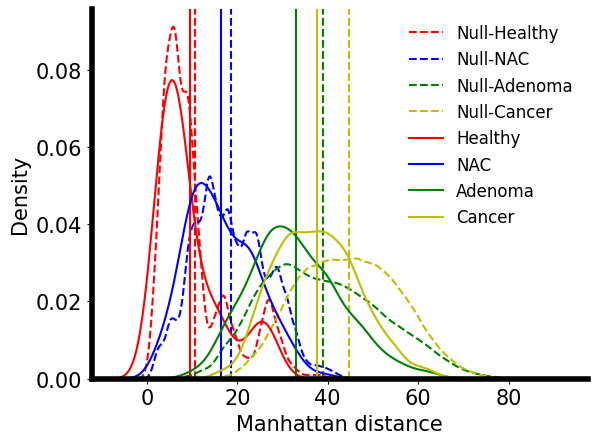

In [40]:
fig = manhattan_distance_plot(heatmap_df=heatmap_df3, hit_limit=4, ad_col="Ad_plot", n_iter=200)
fig.savefig(fig_dir / "GSE48684" / "manhattan_plot_GSE48684.svg", bbox_inches="tight")